# Analysis for the Recovery System

## Read in data; Sanity check on where/what

In [39]:
getwd()
dat.ideal <- read.csv('simData/LV3_L13_ideal_2017-5-30-1804.csv', skip=6)
idealNames <- names(dat.ideal)
dat.ideal <- read.table('simData/LV3_L13_ideal_2017-5-30-1804.csv', header= F, sep=',')
names(dat.ideal) <- idealNames
dat.double <- read.csv('simData/LV3_L13_doubleENSR_2017-5-30-1802.csv', skip=6)

[1] "/home/joedang/PSAS/lv3.0-airframe/sim"

In [40]:
head(dat.ideal)
# names(dat.double)

X..Time..s.,Altitude..km.,Vertical.velocity..m.s.,Vertical.acceleration..m.s..,Total.velocity..m.s.,Total.acceleration..m.s..,Position.East.of.launch..km.,Position.North.of.launch..km.,Lateral.distance..km.,Lateral.direction....,...,Reference.length..in.,Reference.area..m..,Vertical.orientation..zenith.....,Lateral.orientation..azimuth.....,Wind.velocity..m.s.,Air.temperature...C.,Air.pressure..Pa.,Speed.of.sound..m.s.,Simulation.time.step..s.,Computation.time..s.
0.000,0.0000e+00,0.0000000,-6.85450,0.0000000,6.85450,0,0,0,0,...,6.6,0.022072,90,0,NaN,6.03,85832,334.95,0.002,0.0039094
0.002,0.0000e+00,0.0000000,-0.96259,0.0000000,0.96259,0,0,0,0,...,6.6,0.022072,90,0,NaN,6.03,85832,334.95,0.002,0.0064070
0.004,0.0000e+00,0.0000000,4.93030,0.0000000,4.93030,0,0,0,0,...,6.6,0.022072,90,0,NaN,6.03,85832,334.95,0.002,0.0098882
0.006,9.8618e-09,0.0098621,10.82400,0.0098621,10.82400,0,0,0,0,...,6.6,0.022072,90,0,NaN,6.03,85832,334.95,0.002,0.0113170
0.008,5.1236e-08,0.0315120,16.71800,0.0315120,16.71800,0,0,0,0,...,6.6,0.022072,90,0,NaN,6.03,85832,334.95,0.002,0.0128110
0.010,1.4770e-07,0.0649510,22.61300,0.0649510,22.61300,0,0,0,0,...,6.6,0.022072,90,0,NaN,6.03,85832,334.95,0.002,0.0142590


In [41]:
# Print out the event lines from the CSV:
# system('grep \'occur\' simData/LV3_L13_ideal_2017-5-30-1804.csv', intern = TRUE)
events <- as.numeric(system('grep \'occur\' simData/LV3_L13_ideal_2017-5-30-1804.csv | grep -o \'[0-9]\\+\\.*[0-9]*\'', intern = TRUE))
events.names <- system('grep \'occur\' simData/LV3_L13_ideal_2017-5-30-1804.csv | grep -o \'[[:upper:]_]\\{2,\\}\'', intern = TRUE)
names(events) <- events.names
events

LAUNCH                   IGNITION 
                    0.0000                     0.0000 
                   LIFTOFF                  LAUNCHROD 
                    0.0380                     0.2800 
                   BURNOUT            EJECTION_CHARGE 
                    6.3242                     6.3242 
                    APOGEE RECOVERY_DEVICE_DEPLOYMENT 
                   34.8340                    35.3340 
RECOVERY_DEVICE_DEPLOYMENT                 GROUND_HIT 
                  217.7500                   250.6100 
            SIMULATION_END 
                  250.6100

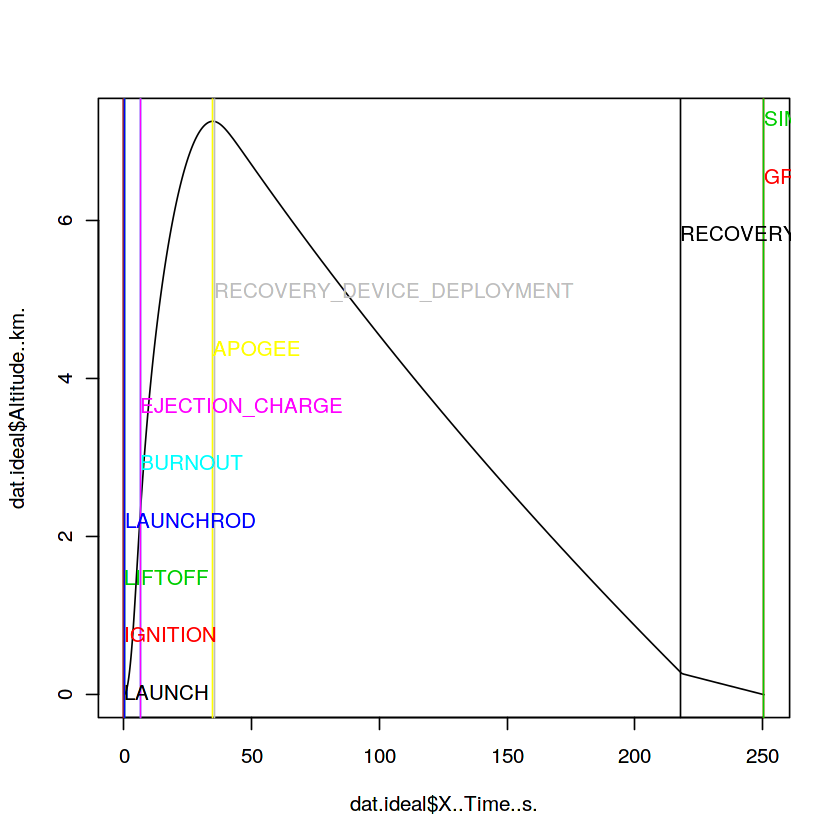

In [95]:
plot(dat.ideal$X..Time..s., dat.ideal$Altitude..km., type='l')
abline(v=events, col=1:length(events))
text(
    labels=names(events),
    x=events,
    y=seq(from=0, to=max(dat.ideal$Alt), length.out=length(events)),
    col=1:length(events),
    pos=4, srt=0, offset=-0.0
)

In [64]:
ind <- which(
    dat.ideal$X..Time..s. > events['LAUNCHROD'] 
    & dat.ideal$X..Time..s. < events['APOGEE']
)
range(ind)
length(ind)

[1]  142 3597

[1] 3456

In [66]:
range(na.omit(dat.ideal$Drag.coefficient....))

[1] 0.38497 0.53593

## Drag Calculations

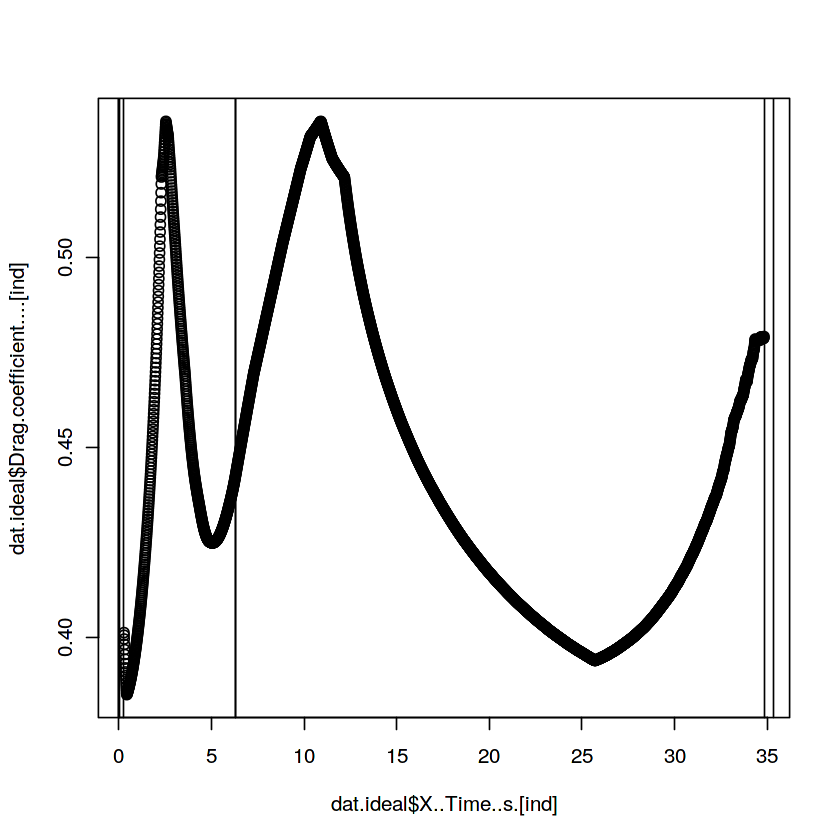

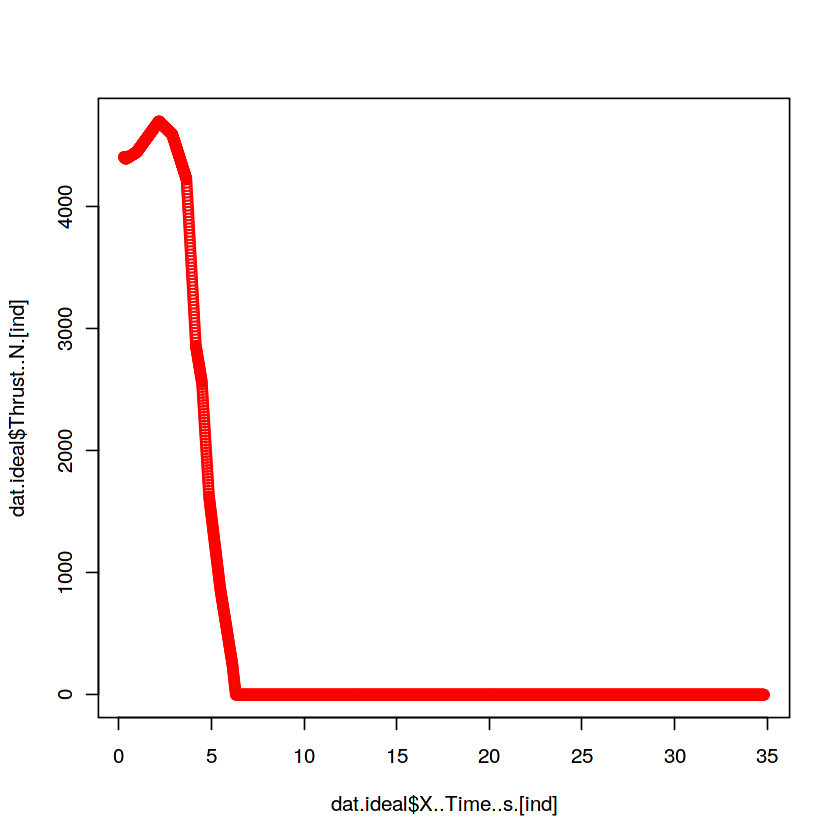

In [68]:
plot(dat.ideal$X..Time..s.[ind], dat.ideal$Drag.coefficient....[ind])
abline(v=events)
plot(dat.ideal$X..Time..s.[ind], dat.ideal$Thrust..N.[ind], col='red')